In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as mpe # <--- 新增的导入
import numpy as np
import os

# 设置Seaborn样式和字体
sns.set_theme(style="white")
sns.set_context("talk")
plt.rcParams['font.family'] = 'Arial'

## overlap data

In [141]:
from autogluon.tabular import TabularPredictor

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.785200,accuracy,57.865652,5373.208540,0.498642,43.014871,2,True,27
1,WeightedEnsemble_L3,0.785200,accuracy,57.868121,5374.884702,0.002469,1.676161,3,True,47
2,XGBoost_BAG_L2,0.784733,accuracy,58.353134,5491.491373,0.986124,161.297703,2,True,34
3,XGBoost_r33_BAG_L2,0.784200,accuracy,58.564541,5702.611176,1.197531,372.417507,2,True,44
4,LightGBMLarge_BAG_L2,0.784133,accuracy,58.058345,5510.183760,0.691336,179.990090,2,True,36
5,LightGBM_BAG_L2,0.783689,accuracy,57.740435,5382.426234,0.373425,52.232564,2,True,28
6,LightGBM_r131_BAG_L2,0.783533,accuracy,57.758617,5394.201965,0.391608,64.008296,2,True,39
7,LightGBM_r96_BAG_L2,0.782244,accuracy,57.867772,5356.287616,0.500762,26.093946,2,True,42
8,RandomForestGini_BAG_L2,0.782178,accuracy,61.995958,5344.995405,4.628948,14.801735,2,True,29
9,CatBoost_r9_BAG_L2,0.781867,accuracy,57.582125,5499.887203,0.215116,169.693534,2,True,41


In [134]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [135]:
import numpy as np
sorted_indices = np.argsort(y_proba, axis=1)[:, ::-1]
indice2class = {i: y_proba.columns[i] for i in range(len(y_proba.columns))}
class2indice = {v: k for k, v in indice2class.items()}
sorted_classes = np.vectorize(lambda x: indice2class[x])(sorted_indices)
sorted_classes


array([['first', 'mm_1', 'mm_1_out', 'mm_2', 'zero'],
       ['mm_2', 'first', 'mm_1_out', 'mm_1', 'zero'],
       ['mm_2', 'first', 'mm_1_out', 'mm_1', 'zero'],
       ...,
       ['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2'],
       ['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2'],
       ['zero', 'mm_1_out', 'mm_1', 'first', 'mm_2']], dtype='<U8')

In [136]:

df_test = pd.DataFrame(columns=['id', 'class', 'pred_1st', 'proba_1st', 'pred_2nd', 'proba_2nd', 'pred_3rd', 'proba_3rd'])
df_test['id'] = test_merge_data['id']
df_test['class'] = y_test
df_test['pred_1st'] = y_pred
df_test['proba_1st'] = y_proba.max(axis=1)
df_test['proba_1st'] = df_test['proba_1st'].round(3)
df_test['pred_2nd'] = sorted_classes[:, 1]
df_test['proba_2nd'] = y_proba.apply(lambda x: sorted(x)[-2], axis=1)
df_test['proba_2nd'] = df_test['proba_2nd'].round(3)
df_test['pred_3rd'] = sorted_classes[:, 2]
df_test['proba_3rd'] = y_proba.apply(lambda x: sorted(x)[-3], axis=1)
df_test['proba_3rd'] = df_test['proba_3rd'].round(3)
df_test['correct'] = df_test['class'] == df_test['pred_1st']
df_test


,id,class,pred_1st,proba_1st,pred_2nd,proba_2nd,pred_3rd,proba_3rd,correct
0,first-0__double-100,first,first,0.499,mm_1,0.271,mm_1_out,0.190,True
1,first-0__double-10004,first,mm_2,0.542,first,0.414,mm_1_out,0.016,False
2,first-0__double-10010,first,mm_2,0.628,first,0.327,mm_1_out,0.016,False
3,first-0__double-10040,first,mm_2,0.614,first,0.335,mm_1_out,0.023,False
4,first-0__double-10042,first,first,0.580,mm_2,0.376,mm_1_out,0.015,True
...,...,...,...,...,...,...,...,...,...
4995,zero-0__single-9957,zero,zero,0.925,mm_1,0.045,mm_1_out,0.010,True
4996,zero-0__single-9961,zero,zero,0.969,mm_1_out,0.008,mm_1,0.008,True
4997,zero-0__single-9964,zero,zero,0.968,mm_1,0.008,mm_1_out,0.008,True
4998,zero-0__single-9974,zero,zero,0.590,mm_1,0.370,mm_1_out,0.013,True


In [137]:
df_correct = df_test[df_test['correct']]
df_correct

,id,class,pred_1st,proba_1st,pred_2nd,proba_2nd,pred_3rd,proba_3rd,correct
0,first-0__double-100,first,first,0.499,mm_1,0.271,mm_1_out,0.190,True
4,first-0__double-10042,first,first,0.580,mm_2,0.376,mm_1_out,0.015,True
5,first-0__double-10083,first,first,0.514,mm_2,0.398,mm_1,0.050,True
6,first-0__double-10141,first,first,0.618,mm_2,0.182,mm_1,0.143,True
7,first-0__double-10154,first,first,0.963,mm_1_out,0.011,mm_2,0.010,True
...,...,...,...,...,...,...,...,...,...
4995,zero-0__single-9957,zero,zero,0.925,mm_1,0.045,mm_1_out,0.010,True
4996,zero-0__single-9961,zero,zero,0.969,mm_1_out,0.008,mm_1,0.008,True
4997,zero-0__single-9964,zero,zero,0.968,mm_1,0.008,mm_1_out,0.008,True
4998,zero-0__single-9974,zero,zero,0.590,mm_1,0.370,mm_1_out,0.013,True


In [142]:
def draw_fig(data_id, raw_data, sp_mode, legend=False, title=False, alpha=0.1, color='blue', marker=None):
    if sp_mode == 'sp':
        y_1 = raw_data[raw_data['id'] == data_id].iloc[:, 1:31].values[0]
        y_2 = raw_data[raw_data['id'] == data_id].iloc[:, 31:].values[0]
        # cat_conc = raw_data[raw_data['id'] == data_id].iloc[:, 1].values[0]
        x = np.arange(1, 31)/31
        plt.plot(x, y_1, label='s')
        plt.plot(x, y_2, label='p')
        plt.ylim(-0.05, 1.05)
        if title:
            plt.title(f'{data_id}')
        if legend:
            plt.legend()
        # plt.show()
    elif sp_mode == 's':
        y = raw_data[raw_data['id'] == data_id].iloc[:, 1:31].values[0]
        # cat_conc = raw_data[raw_data['id'] == data_id].iloc[:, 1].values[0]
        x = np.arange(1, 31)/31
        if not marker:
            plt.plot(x, y, alpha=alpha, color=color)
            plt.ylim(-0.05, 1.05)
            plt.xticks([0, 1], fontweight='bold')
            plt.yticks([0, 1], fontweight='bold')
            plt.xlabel('Normalized Time')
            plt.ylabel('Normalized Conc. [S]')
        if marker == '.':
            plt.plot(x, y, marker='.', linestyle='', alpha=alpha, color=color)
            draw_gausi_error_band(data_id=data_id, alpha=alpha*0.3, color=color)
            plt.ylim(-0.05, 1.05)
            plt.xticks([0], fontweight='bold')
            plt.yticks([0], fontweight='bold')
            plt.xlabel('Time')
            plt.ylabel('[S] (M)')
        if title:
            plt.title(f'{data_id}')
        if legend:
            plt.legend()
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(1)
        
        

def draw_gausi_error_band(data_id, alpha, color):
    class_name = data_id.split('-')[0]
    csv_path = f'data/{str(class_num)}_class/raw/{class_name}__10k.csv'
    df = pd.read_csv(csv_path)
    x = np.arange(1, 31)/31
    y = df[df['id'] == data_id].iloc[:, 1:31].values[0]
    y_err = 0.05
    plt.fill_between(x, y-y_err, y+y_err, alpha=alpha, color=color, label='_nolegend_')

37
['mm_1-mm__single-8238' 'mm_1-mm__single-3758' 'mm_1-mm__single-5503'
 'mm_1-mm__single-6556' 'mm_1-mm__single-888' 'mm_1-mm__single-5409'
 'mm_1-mm__single-9374' 'mm_1-mm__single-9244' 'mm_1-mm__single-4013'
 'mm_1-mm__single-7']


Text(0.5, 1.0, 'only mm_1')

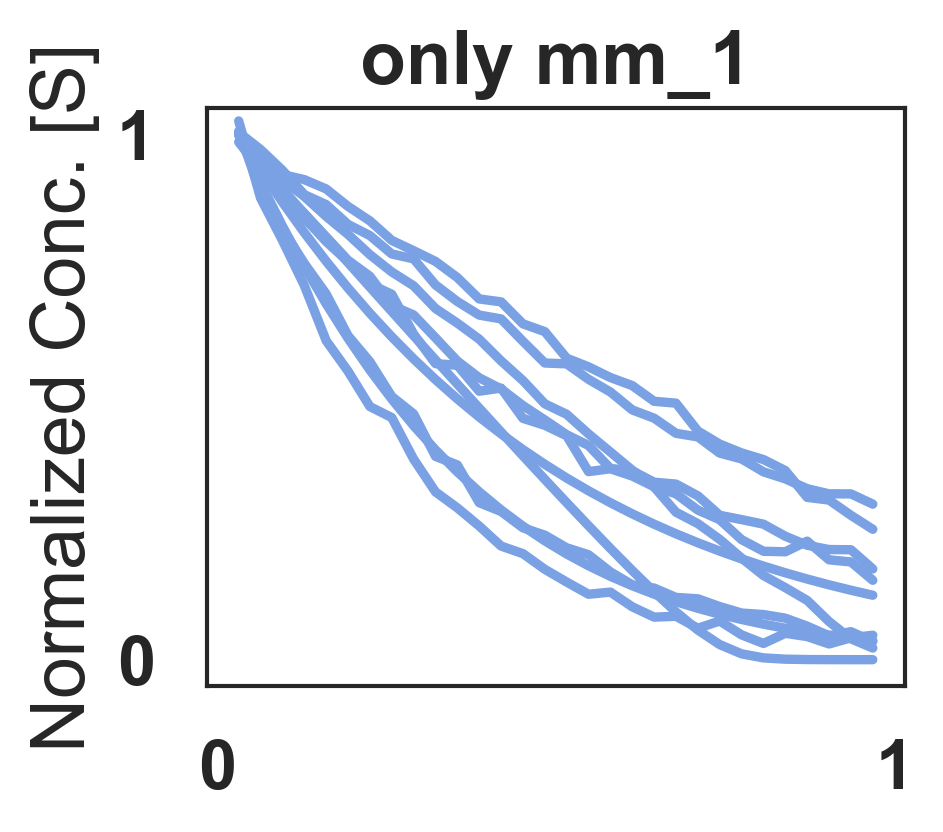

In [20]:
import random
class_name = 'S2'
random_seed = random.randint(0, 100)
random_seed = 37
df_random = df_correct[(df_correct['class'] == class_name) & (df_correct['proba_1st'] - df_correct['proba_2nd'] > 0.5)].sample(10, random_state=random_seed)
print(random_seed)
plt.figure(figsize=(3, 2.5), dpi=300)
for i, r in df_random.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#79A1E3'
    )
# plt.legend(df_random['id'])
print(df_random['id'].values)
plt.xlabel('')
plt.title('only S2', fontweight='bold')

475
['first-1__single-8017' 'first-0__double-7677' 'first-0__double-651'
 'first-1__single-1831' 'first-0__double-7537' 'first-1__single-6697'
 'first-1__single-7857' 'first-0__double-5430' 'first-1__single-870'
 'first-1__single-10727']


Text(0.5, 1.0, 'only first')

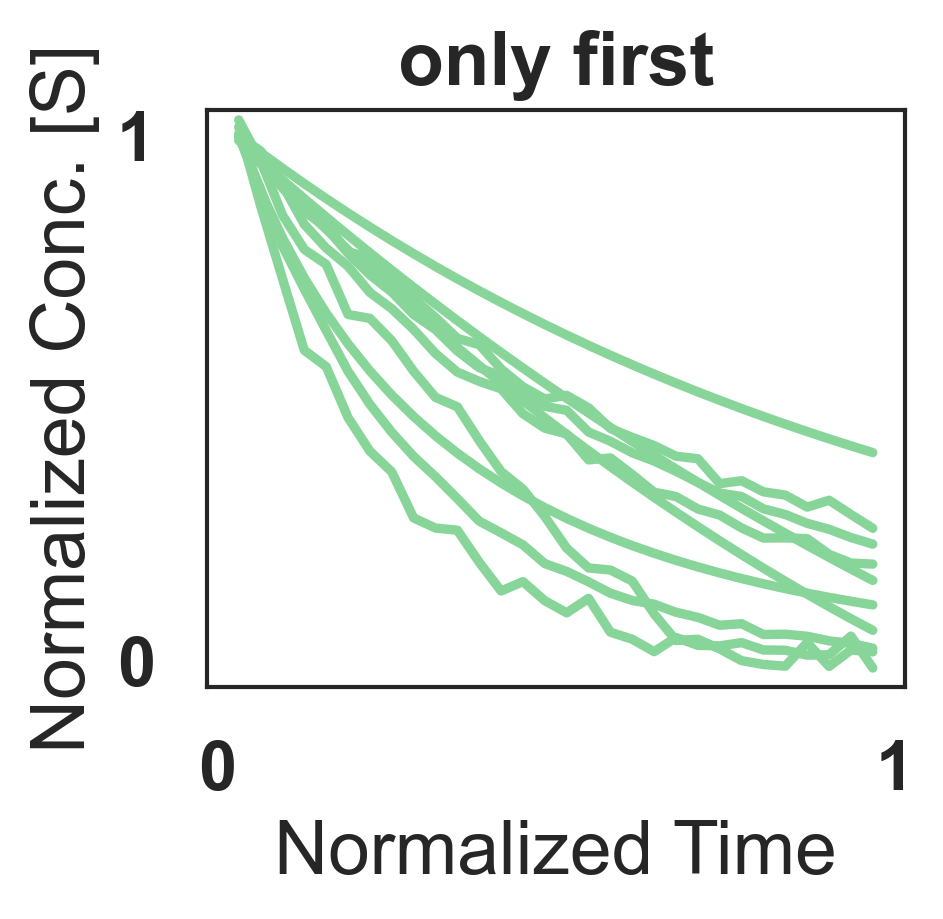

In [21]:
import random
class_name = 'S3'
random_seed = random.randint(0, 1000)
random_seed = 475
df_random = df_correct[(df_correct['class'] == class_name) & (df_correct['proba_1st'] - df_correct['proba_2nd'] > 0.5)].sample(10, random_state=random_seed)
print(random_seed)
plt.figure(figsize=(3, 2.5), dpi=300)
for i, r in df_random.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#88D59A'
    )
# plt.legend(df_random['id'])
print(df_random['id'].values)
plt.title('only S3', fontweight='bold')

29
26


Text(0.5, 1.0, 'mm_1 or first')

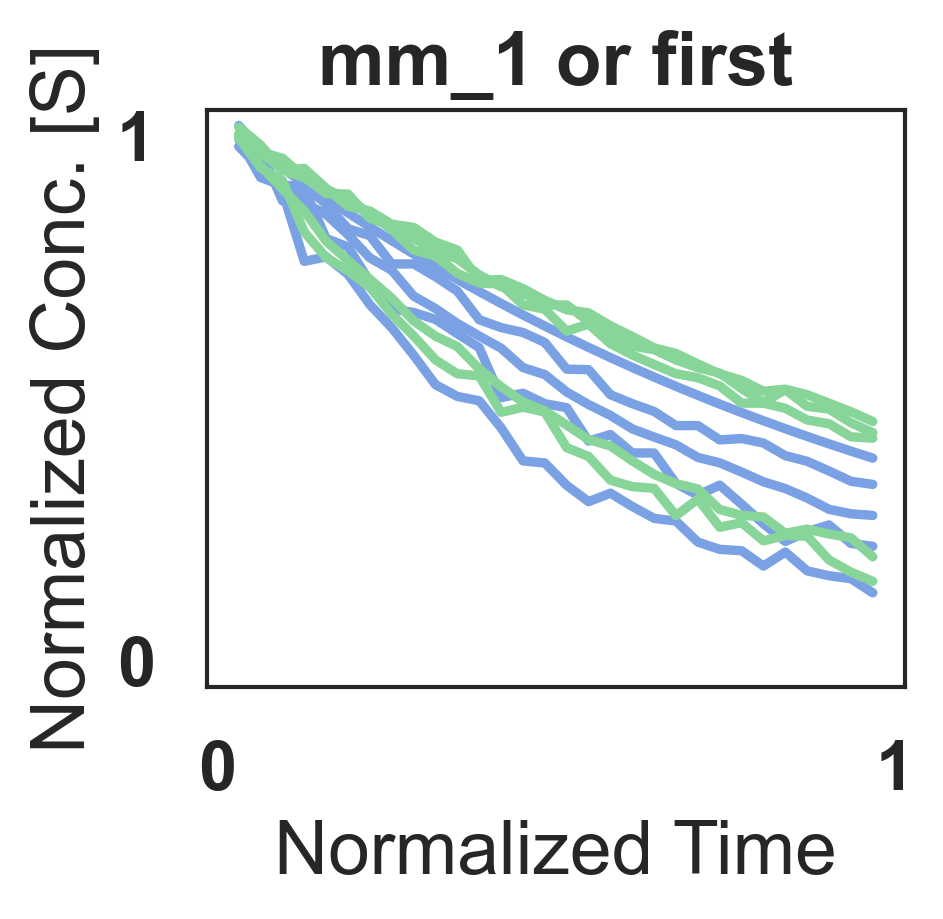

In [22]:
import random
random_seed = random.randint(0, 100)
random_seed = 29
print(random_seed)
df_random_mm1 = df_correct[(df_correct['class'] == 'S2') & 
                           (df_correct['proba_1st'] - df_correct['proba_2nd'] < 0.1) &
                           (df_correct['pred_2nd'] == 'S3')].sample(5, random_state=random_seed)
random_seed = random.randint(0, 100)
random_seed = 26
print(random_seed)
df_random_S3 = df_correct[(df_correct['class'] == 'S3') & 
                             (df_correct['proba_1st'] - df_correct['proba_2nd'] < 0.1) &
                             (df_correct['pred_2nd'] == 'S2')].sample(5, random_state=random_seed)
plt.figure(figsize=(3, 2.5), dpi=300)
for i, r in df_random_mm1.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#79A1E3'
    )
for i, r in df_random_S3.iterrows():
    draw_fig(
        r['id'], 
        test_raw_data, 
        sp_mode, 
        legend=False, 
        title=False,
        alpha=1,
        color='#88D59A'
    )
plt.title('S2 or S3', fontweight='bold')

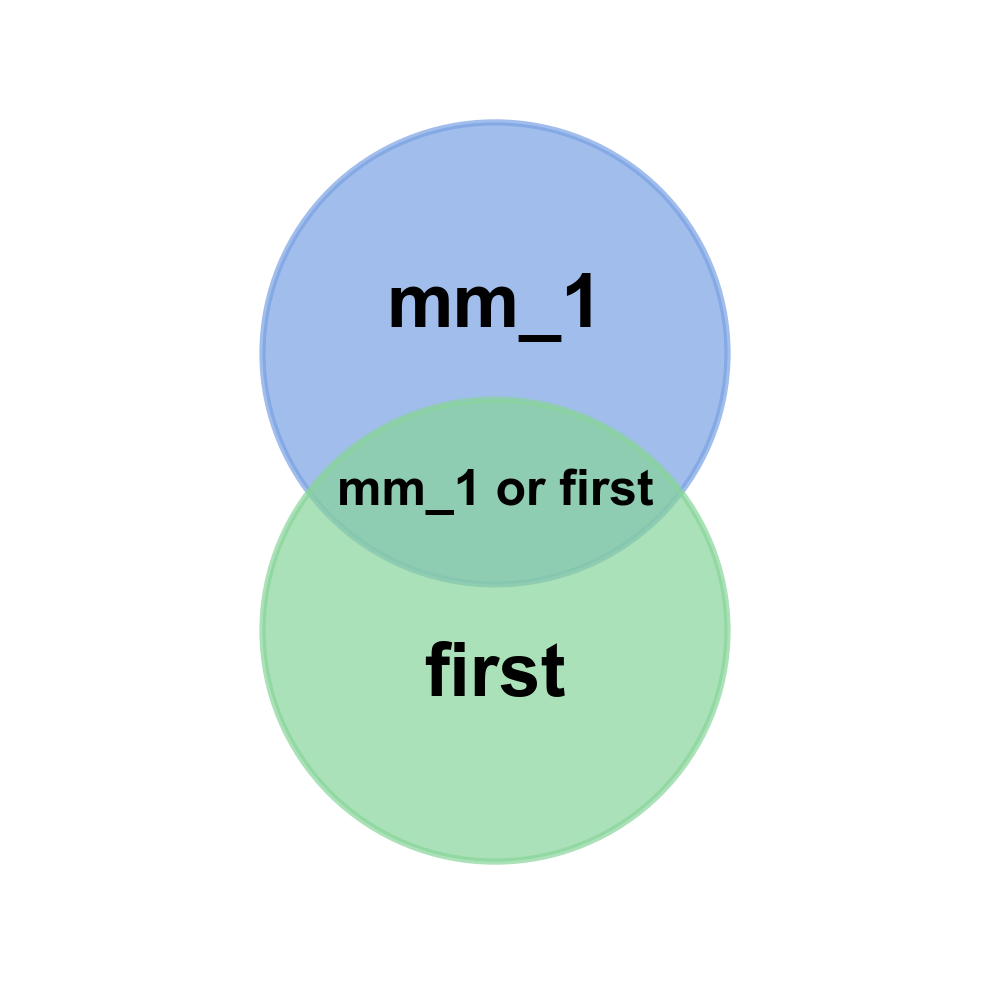

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 创建画布
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

# 定义两个圆的参数
circle1 = Circle((0.5, 0.65), 0.25, color='#79A1E3', alpha=0.7, label='S2')  # 圆心在 (0.4, 0.5)，半径 0.3
circle2 = Circle((0.5, 0.35), 0.25, color='#88D59A', alpha=0.7, label='S3')   # 圆心在 (0.6, 0.5)，半径 0.3

# 添加圆到图像中
ax.add_patch(circle1)
ax.add_patch(circle2)

ax.text(0.5, 0.7, 'S2', color='black', ha='center', va='center', fontsize=18, fontweight='bold')  # 圆心 (0.5, 0.65)
ax.text(0.5, 0.3, 'S3', color='black', ha='center', va='center', fontsize=18, fontweight='bold')  # 圆心 (0.5, 0.35)
ax.text(0.5, 0.5, 'S2 or S3', color='black', ha='center', va='center', fontsize=12, fontweight='bold')  # 圆心 (0.5, 0.35)

# 设置图像范围和比例
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
ax.axis('off')
plt.show()


910
['mm_1_out-mm__single_outside-17157' 'mm_1_out-mm__single_outside-2816'
 'mm_1_out-mm__single_outside-13489']


([], [])

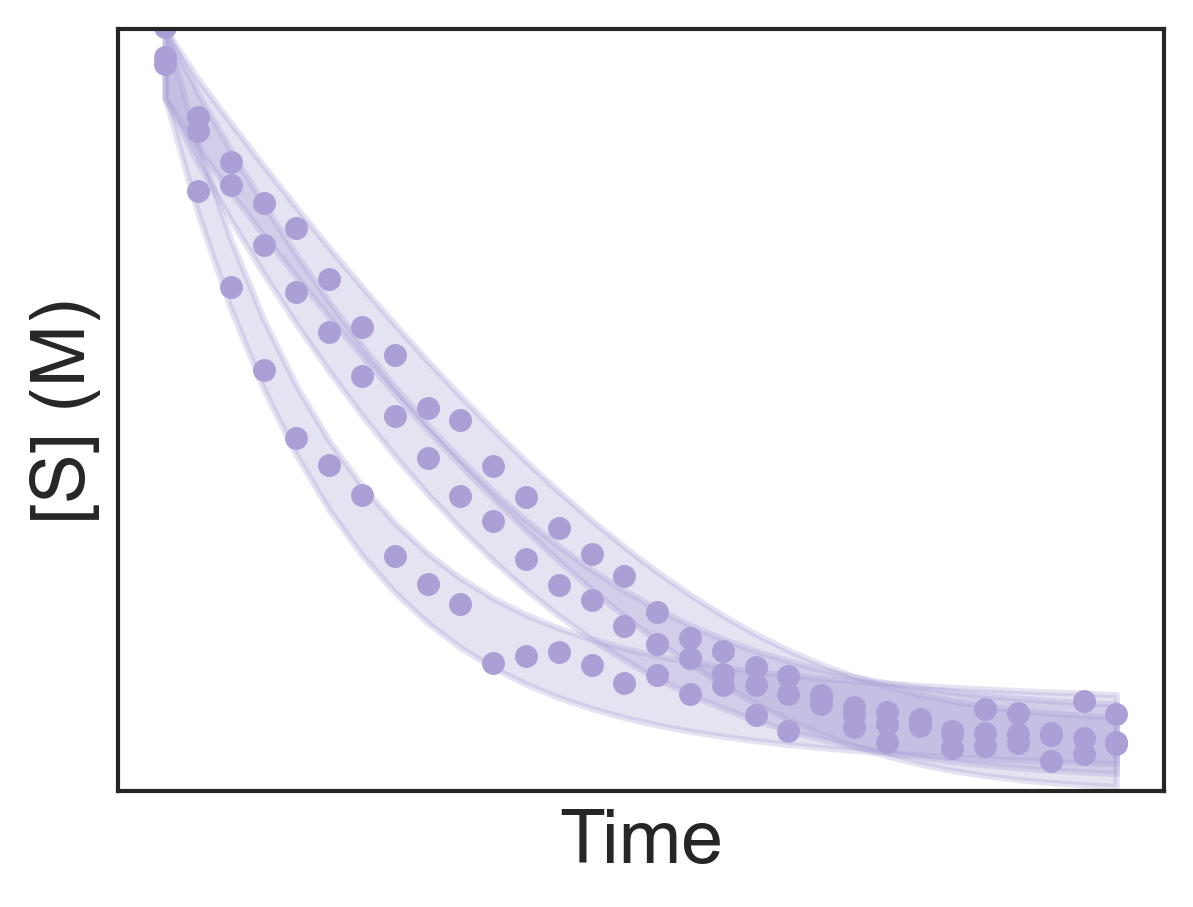

In [178]:
plt.figure(figsize=(4.5, 3.3), dpi=300)

random_seed = random.randint(0, 1000)
# random_seed = 97
print(random_seed)
data_ids = df_correct[df_correct['class']=='S5'].sample(3, random_state=random_seed)['id'].values
print(data_ids)
for data_id in data_ids:
    draw_fig(
        data_id=data_id,
        raw_data=test_raw_data,
        sp_mode=sp_mode,
        legend=False,
        title=False,
        alpha=1,
        color='#AB9FD6',
        marker='.',
    )

plt.xticks([])
plt.yticks([])

97
zero-0__single-10179


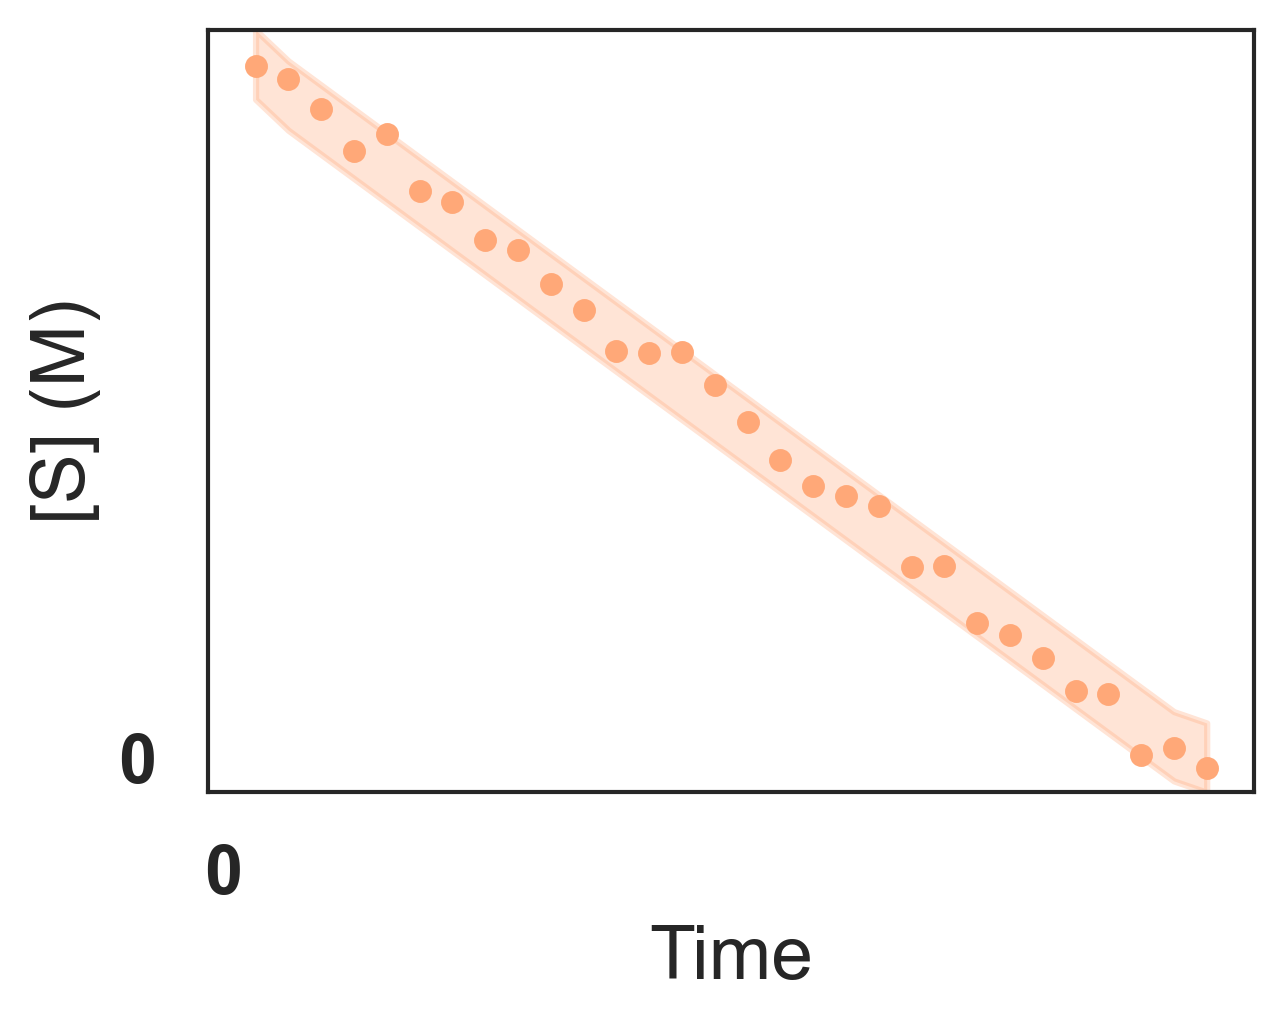

In [ ]:
plt.figure(figsize=(4.5, 3.3), dpi=300)

random_seed = random.randint(0, 100)
random_seed = 97
print(random_seed)
data_id = df_correct[df_correct['class']=='S1'].sample(1, random_state=random_seed)['id'].values[0]
print(data_id)
draw_fig(
    data_id=data_id,
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=False,
    title=False,
    alpha=1,
    color='#FFA878',
    marker='.',
)

33
['zero-0__single-3155' 'zero-0__single-12285' 'zero-0__single-2372']
['mm_1-mm__single-5833' 'mm_1-mm__single-3918' 'mm_1-mm__single-9072']
['first-1__single-3898' 'first-1__single-2236' 'first-1__single-1587']
['mm_2-mm__double-4104' 'mm_2-mm__double-2991' 'mm_2-mm__double-174']


([], [])

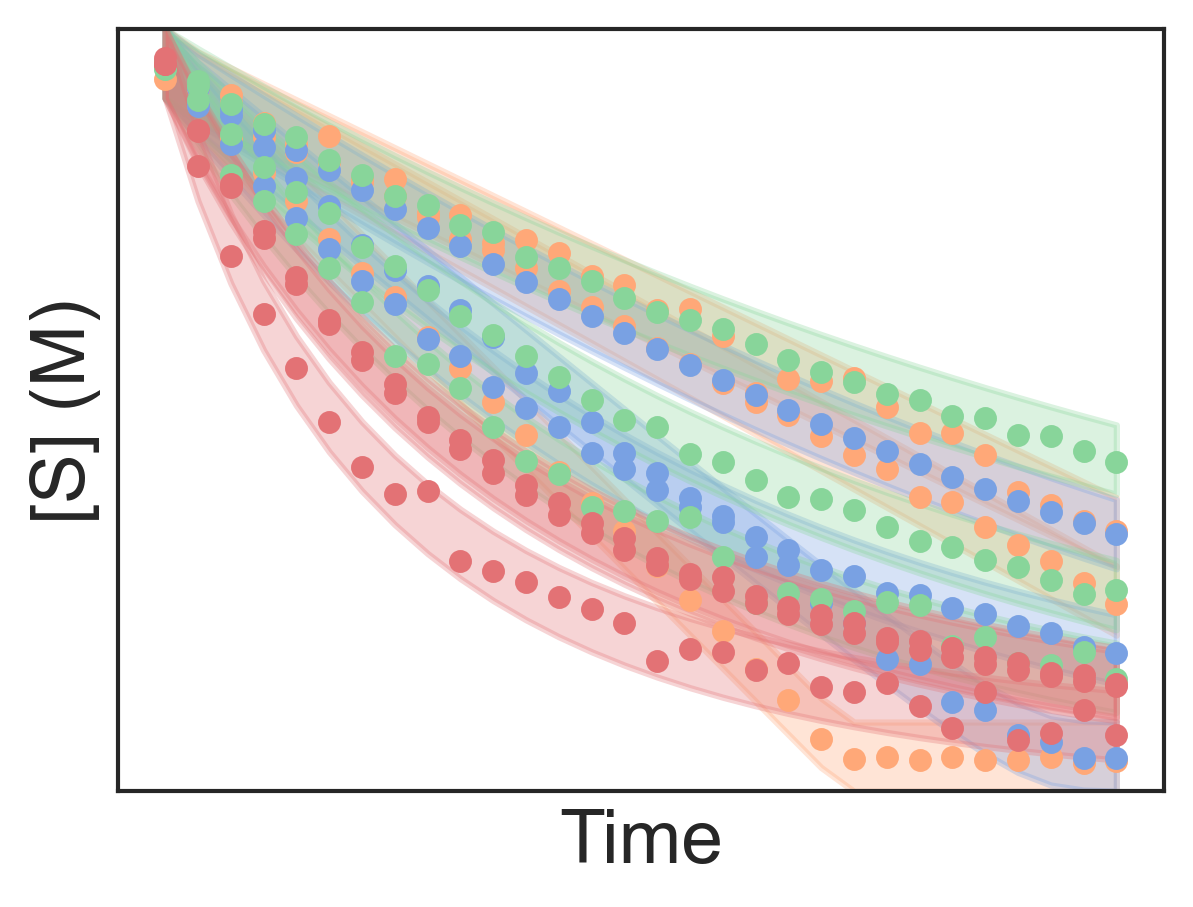

In [131]:
plt.figure(figsize=(4.5, 3.3), dpi=300)
random_seed = random.randint(0, 100)
random_seed = 33
# print(random_seed)
# data_id = df_correct[df_correct['class']=='S2'].sample(1, random_state=random_seed)['id'].values[0]
# print(data_id)
# draw_fig(
#     data_id=data_id,
#     raw_data=test_raw_data,
#     sp_mode=sp_mode,
#     legend=False,
#     title=False,
#     alpha=1,
#     color='#79A1E3',
#     marker='.',
# )
# random_seed = 5
print(random_seed)

data_ids = df_correct[df_correct['class']=='S1'].sample(3, random_state=random_seed)['id'].values
print(data_ids)
for data_id in data_ids:
    draw_fig(
        data_id=data_id,
        raw_data=test_raw_data,
        sp_mode=sp_mode,
        legend=False,
        title=False,
        alpha=1,
        color='#FFA878',
        marker='.',
    )

data_ids = df_correct[df_correct['class']=='S2'].sample(3, random_state=random_seed)['id'].values
print(data_ids)
for data_id in data_ids:
    draw_fig(
        data_id=data_id,
        raw_data=test_raw_data,
        sp_mode=sp_mode,
        legend=False,
        title=False,
        alpha=1,
        color='#79A1E3',
        marker='.',
    )

data_ids = df_correct[df_correct['class']=='S3'].sample(3, random_state=random_seed)['id'].values
print(data_ids)
for data_id in data_ids:
    draw_fig(
        data_id=data_id,
        raw_data=test_raw_data,
        sp_mode=sp_mode,
        legend=False,
        title=False,
        alpha=1,
        color='#88D59A',
        marker='.',
    )

data_ids = df_correct[df_correct['class']=='S4'].sample(3, random_state=random_seed)['id'].values
print(data_ids)
for data_id in data_ids:
    draw_fig(
        data_id=data_id,
        raw_data=test_raw_data,
        sp_mode=sp_mode,
        legend=False,
        title=False,
        alpha=1,
        color='#E37275',
        marker='.',
    )
plt.xticks([])
plt.yticks([])

1
first-1__single-8562


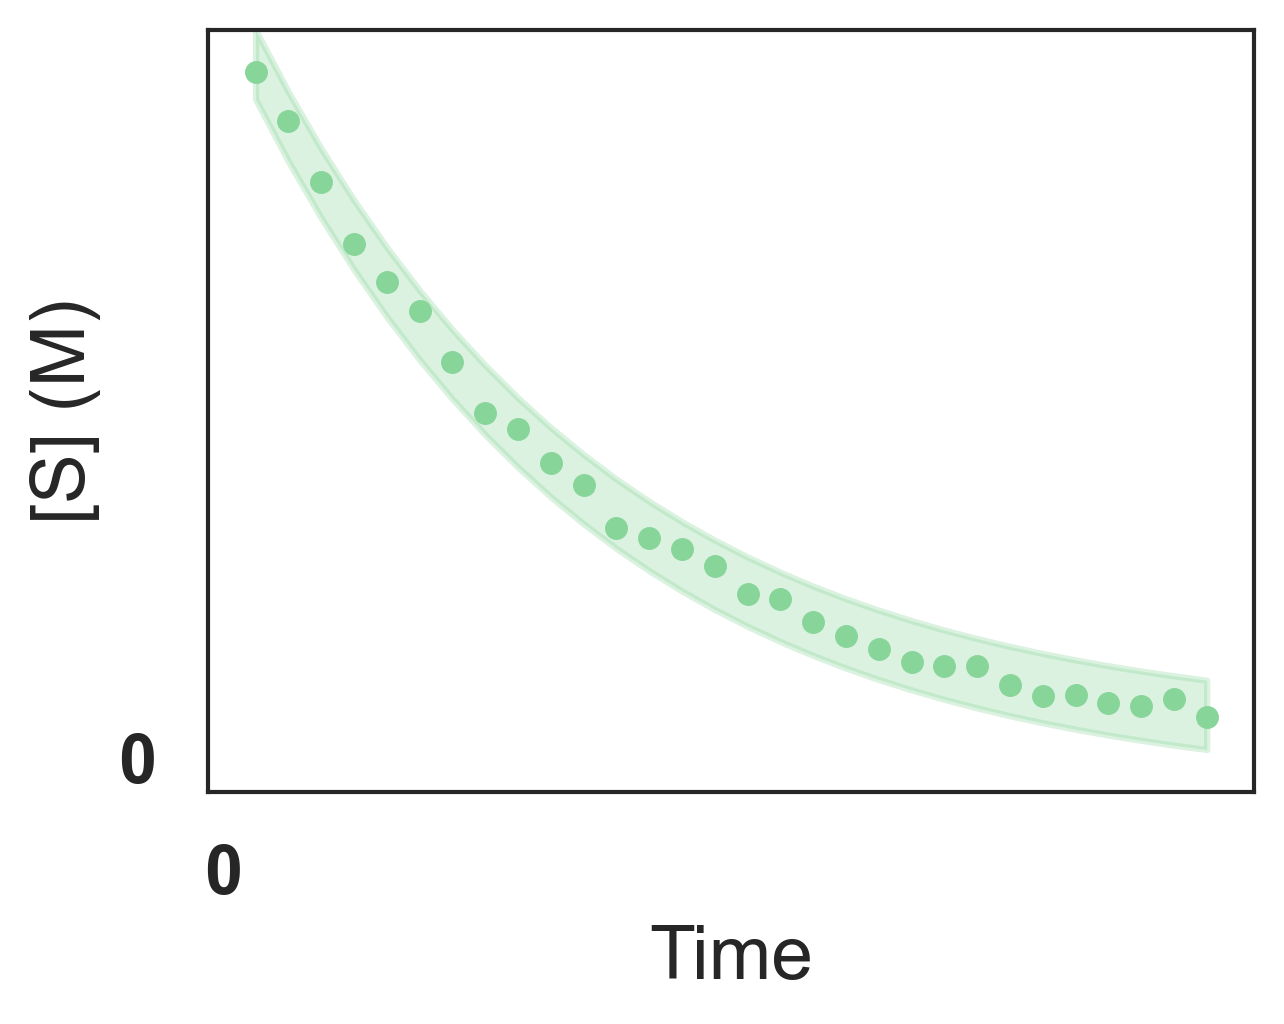

In [41]:
plt.figure(figsize=(4.5, 3.3), dpi=300)
random_seed = random.randint(0, 100)
random_seed = 1
print(random_seed)
data_id = df_correct[df_correct['class']=='S3'].sample(1, random_state=random_seed)['id'].values[0]
print(data_id)
draw_fig(
    data_id=data_id,
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=False,
    title=False,
    alpha=1,
    color='#88D59A',
    marker='.',
)


7
mm_2-mm__double-10717


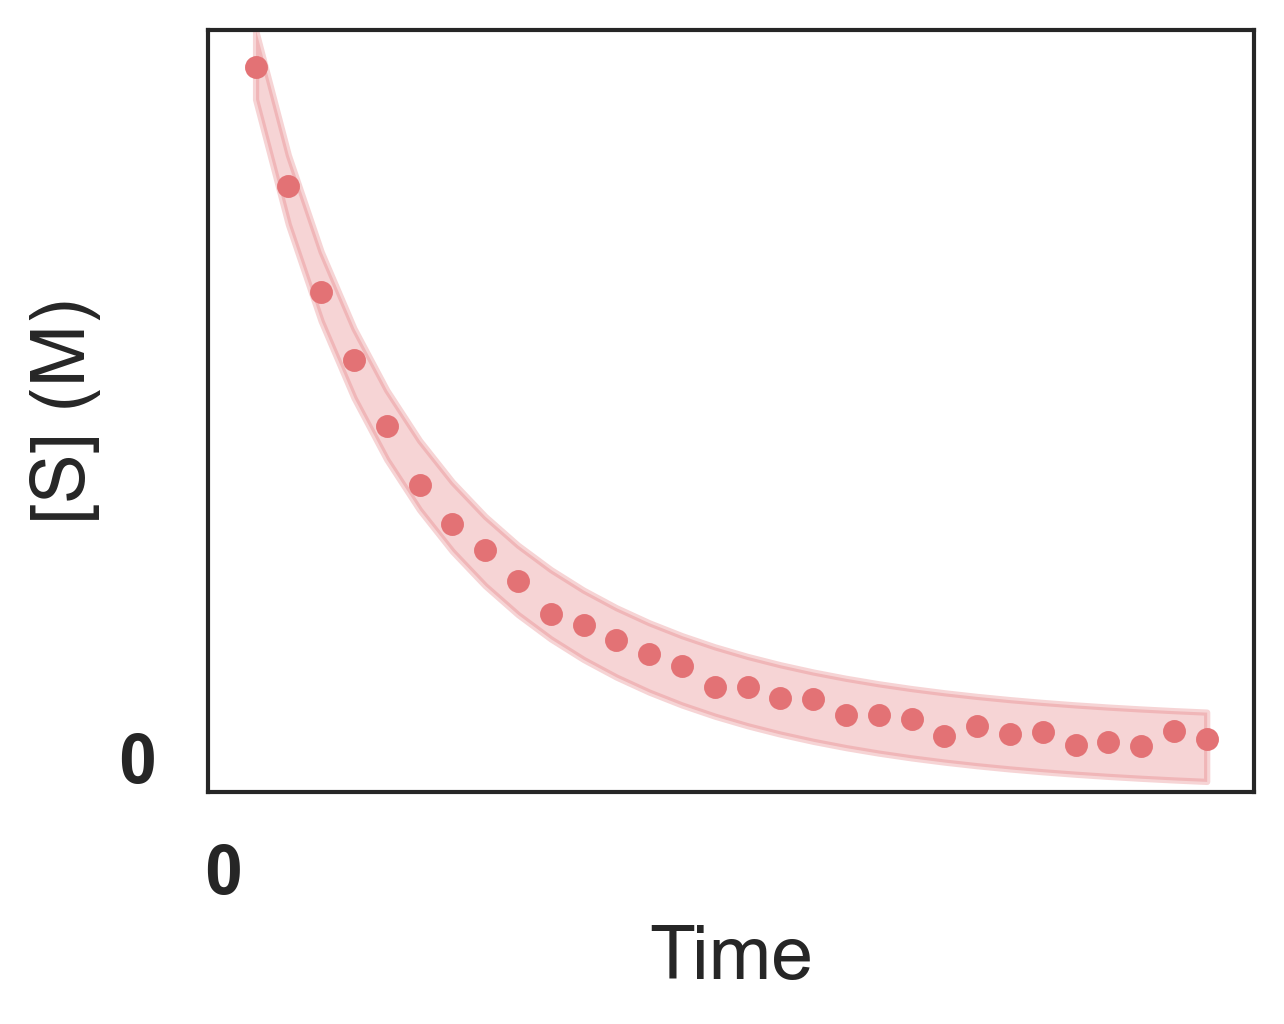

In [42]:
plt.figure(figsize=(4.5, 3.3), dpi=300)
random_seed = random.randint(0, 100)
random_seed = 7
print(random_seed)
data_id = df_correct[df_correct['class']=='S4'].sample(1, random_state=random_seed)['id'].values[0]
print(data_id)
draw_fig(
    data_id=data_id,
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=False,
    title=False,
    alpha=1,
    color='#E37275',
    marker='.',
)

# plt.legend(['S1', 'S2', 'S3', 'S4'], loc='center right')

In [70]:
df_1a = pd.DataFrame({
    'class': ['S1', 'S2', 'S3', 'S4'], 
    'pred_proba': [0.18, 0.65, 0.1, 0.07]
})


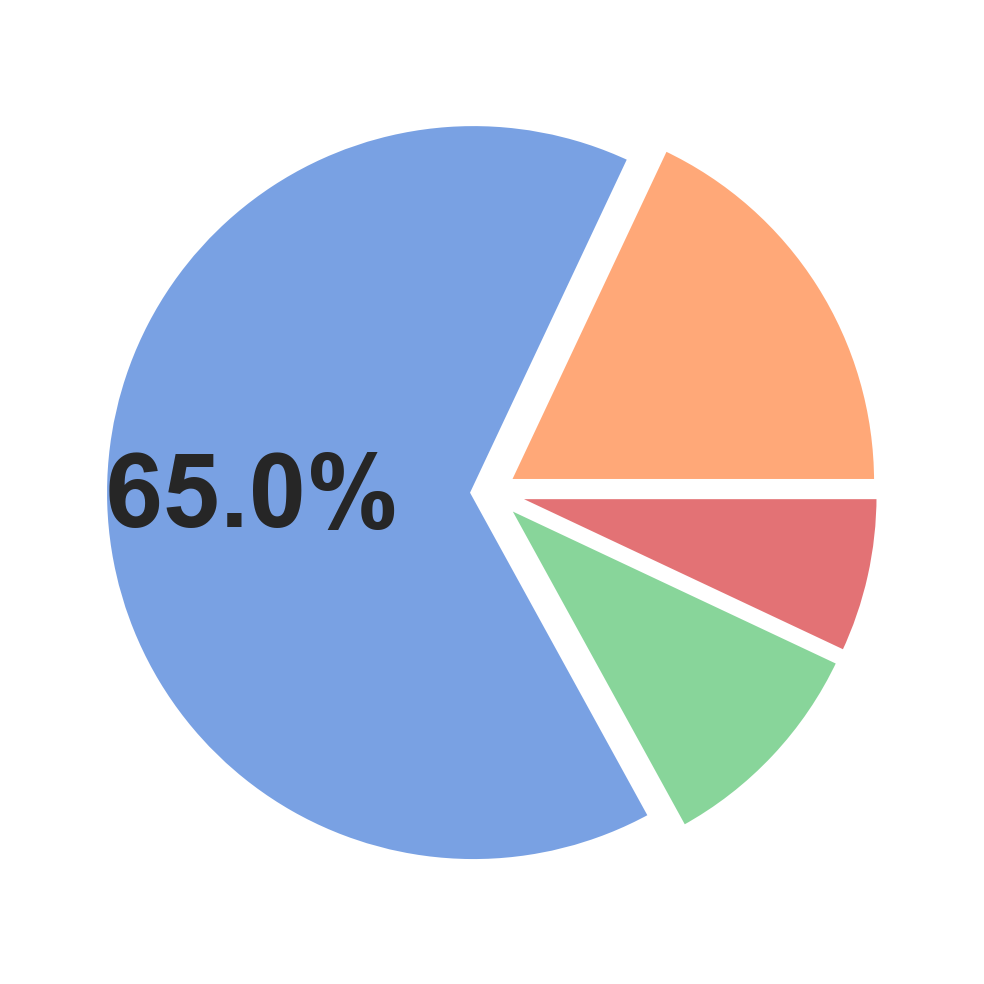

In [71]:
def autopct_only_max(pct, sizes):
    '''
    only show the percentage of the largest value
    '''
    value = pct / 100.0
    tolerance = 1e-3
    if abs(value - max(sizes)) < tolerance:
        return f'{pct:.1f}%'
    else:
        return ''
plt.figure(figsize=(4, 4), dpi=300)
explode = [0.05, 0.05, 0.05, 0.05]
plt.pie(
    df_1a['pred_proba'], 
    # labels=df_1a['class'], 
    autopct=lambda pct: autopct_only_max(pct, df_1a['pred_proba']),
    colors=['#FFA878', '#79A1E3', '#88D59A', '#E37275'],
    textprops={'fontweight': 'bold', 'fontsize': 25},
    explode=explode,
)
plt.show()


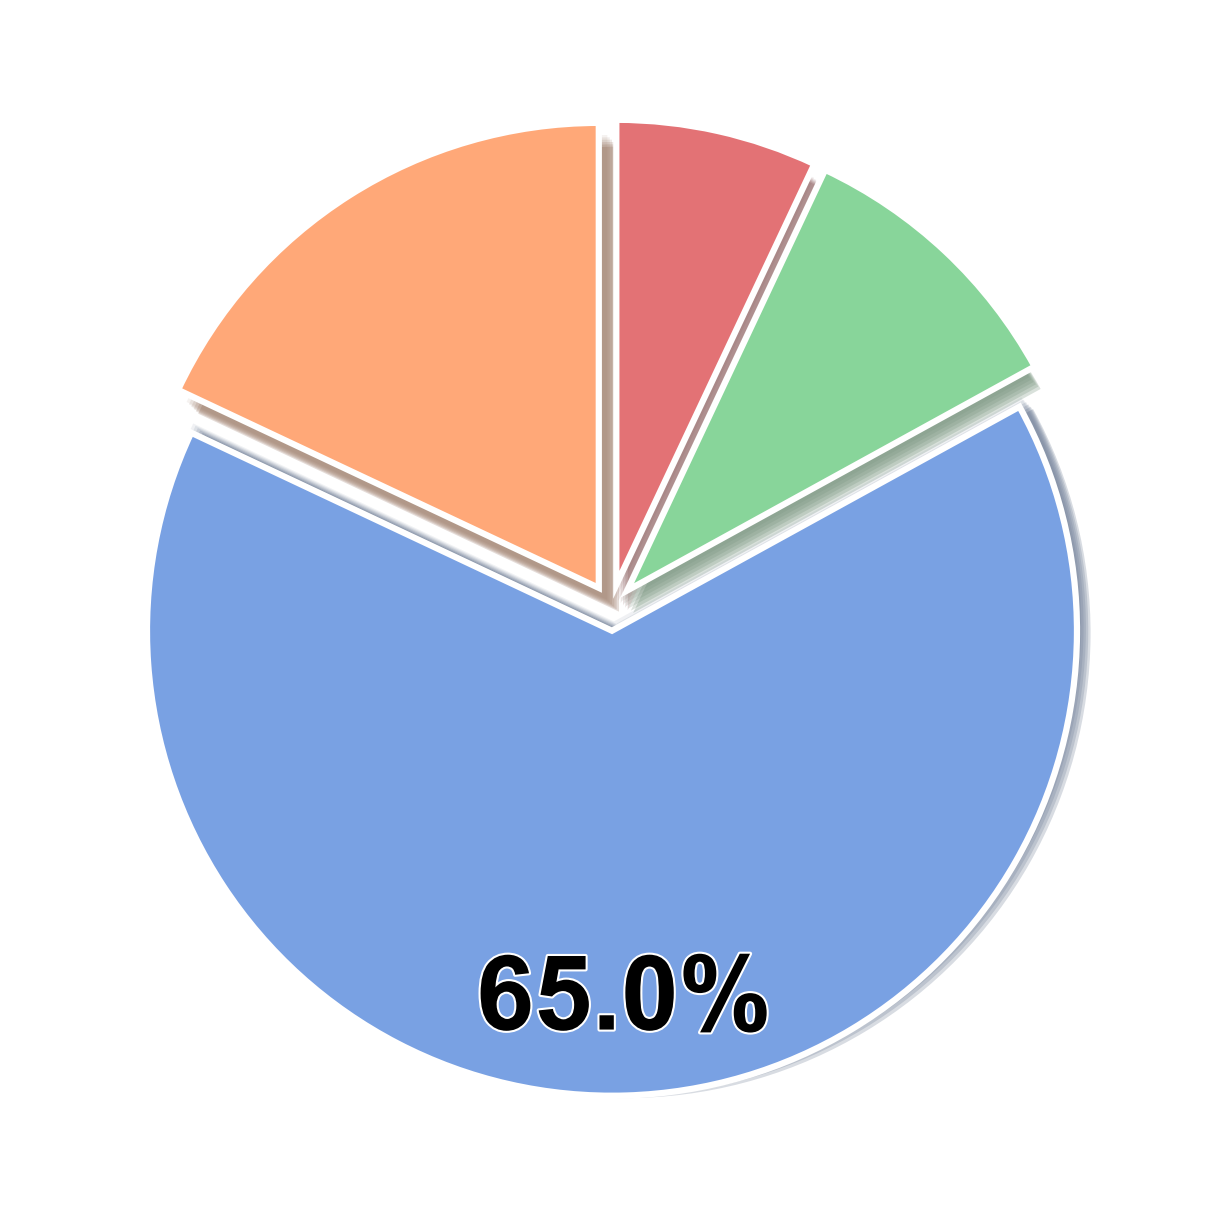

In [120]:
# --- 3D Pie Chart Simulation ---
fig, ax = plt.subplots(figsize=(5, 5), dpi=300) # Increased size slightly for better visual
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#FFA878', '#79A1E3', '#88D59A', '#E37275']
# Ensure 'pred_proba' is a numpy array for autopct
pred_proba_values = df_1a['pred_proba'].values

# Parameters for 3D effect
shadow_offset_x = 0.03
shadow_offset_y = -0.03 # Negative to shift downwards
num_shadows = 6 # Number of shadow layers for a smoother effect
shadow_alpha_start = 0.2
shadow_alpha_end = 0.05

# 1. Draw shadows/depth
for i in range(num_shadows, 0, -1):
    # Darken colors for shadow
    shadow_colors_current = []
    for color in colors:
        r, g, b = tuple(int(color.lstrip('#')[j:j+2], 16) for j in (0, 2, 4))
        factor = 0.5 # Darkening factor
        dark_r, dark_g, dark_b = int(r*factor), int(g*factor), int(b*factor)
        shadow_colors_current.append(f'#{dark_r:02x}{dark_g:02x}{dark_b:02x}')

    current_offset_x = shadow_offset_x * (i / num_shadows)
    current_offset_y = shadow_offset_y * (i / num_shadows)
    current_alpha = shadow_alpha_start - (shadow_alpha_start - shadow_alpha_end) * ((num_shadows-i)/num_shadows)

    wedges_shadow, _ = ax.pie(
        pred_proba_values,
        colors=shadow_colors_current,
        radius=1.0, # Shadow radius
        explode=[e*0.5 for e in explode], # Slightly less explode for shadow
        startangle=90, # Match start angle
        center=(current_offset_x, current_offset_y), # Shift shadow
        wedgeprops={'alpha': current_alpha, 'edgecolor': 'none'} # Make shadow semi-transparent
    )


# 2. Draw the main pie chart on top
wedges_main, texts_main, autotexts_main = ax.pie(
    pred_proba_values,
    autopct=lambda pct: autopct_only_max(pct, pred_proba_values),
    colors=colors,
    explode=explode,
    radius=1.0, # Main pie radius
    startangle=90, # Adjust start angle for a "tilted" look if desired
    # wedgeprops={'edgecolor': 'gray', 'linewidth': 0.7}, # Add edge to main pie
    pctdistance=0.80, # Distance of autopct text from center
    textprops={'fontweight': 'bold', 'fontsize': 10} # Adjusted fontsize for autopct
)

# Style autopct (percentage text)
for autotext in autotexts_main:
    autotext.set_color('black') # Ensure percentage text is visible
    autotext.set_fontweight('bold')
    autotext.set_fontsize(25) # Original fontsize
    autotext.set_path_effects([mpe.withStroke(linewidth=1, foreground='white')]) # <--- 修改后的行


# Optional: Add a title
# plt.title('3D Effect Pie Chart', fontweight='bold', fontsize=16)

# Remove axis ticks and labels if any were auto-generated by subplots
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)


plt.show()

/tmp/ipykernel_2466169/2080959464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


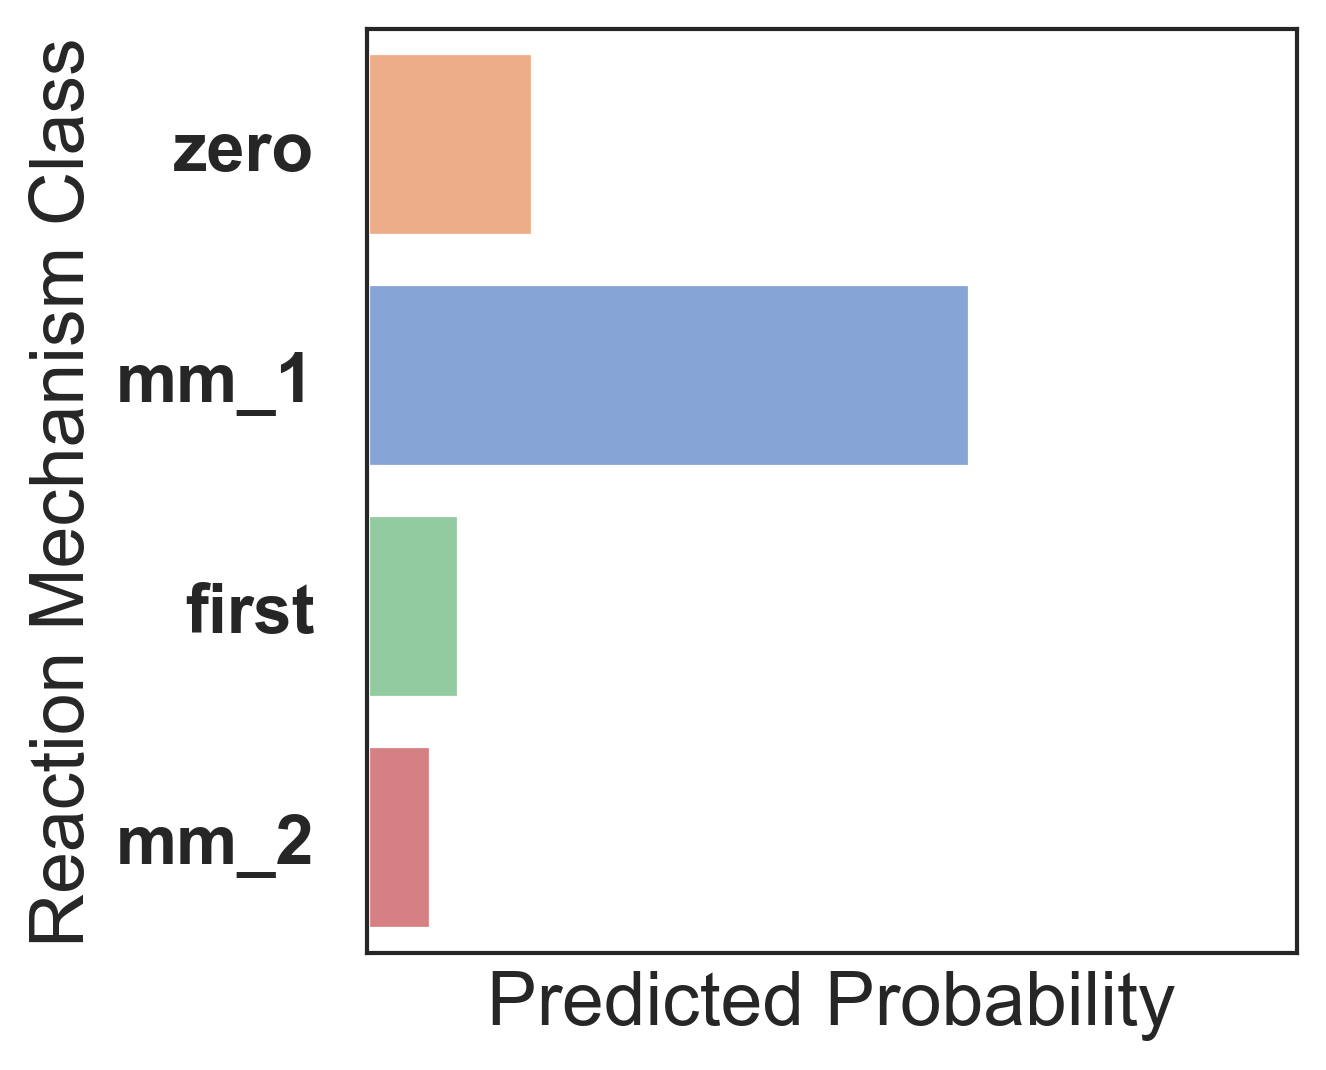

In [74]:
sns.set_theme(style="white")
sns.set_context("talk")
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(4, 4), dpi=300)
sns.barplot(
    x='pred_proba',
    y='class',
    data=df_1a,
    palette=['#FFA878', '#79A1E3', '#88D59A', '#E37275'],

)
plt.xlim(0, 1)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1)
ax.set_xlabel('Predicted Probability')
ax.set_xticks([])
for tick_label in ax.get_yticklabels():
    tick_label.set_fontweight('bold')
ax.set_ylabel('Reaction Mechanism Class')
plt.show()

47
mm_1-mm__single-4559


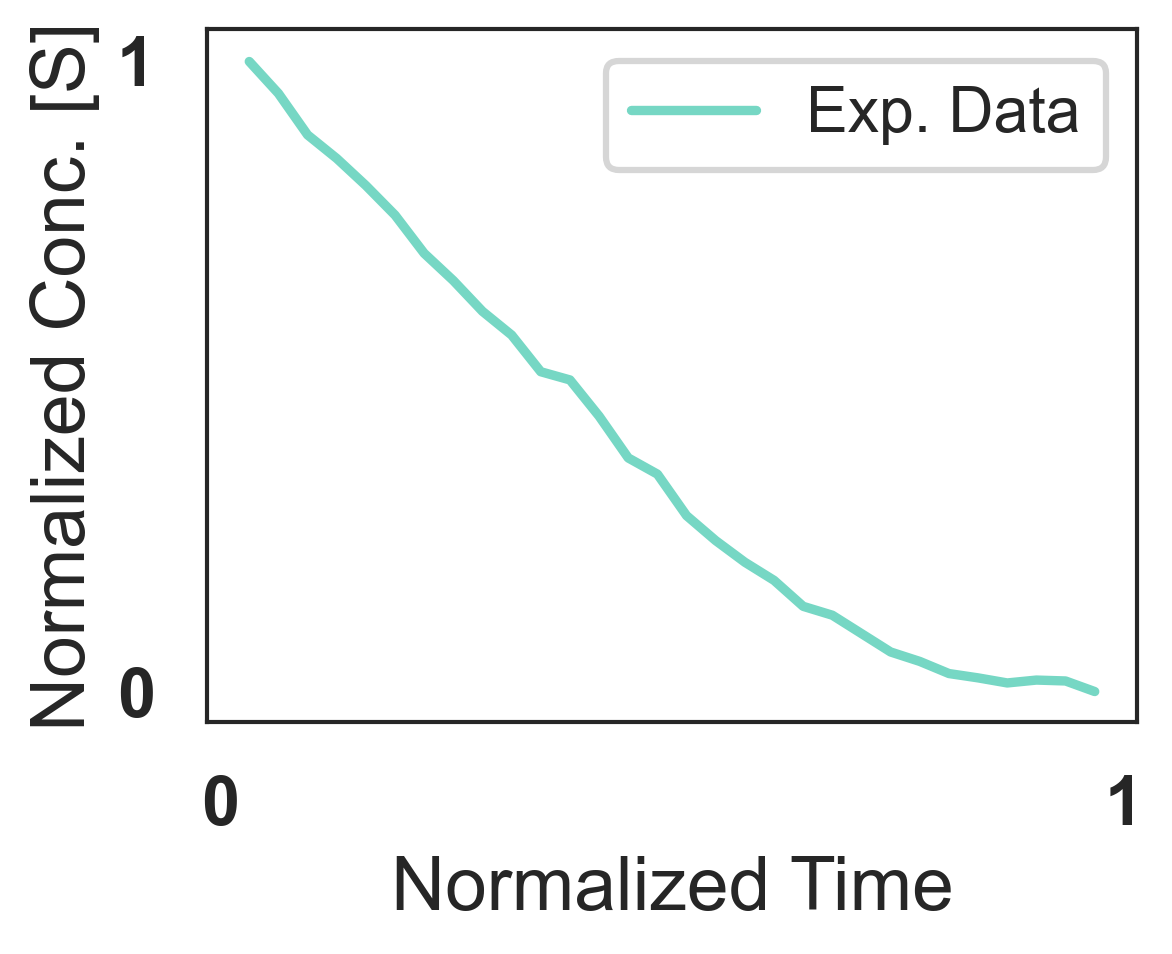

In [112]:
plt.figure(figsize=(4, 3), dpi=300)
random_seed = random.randint(0, 100)
random_seed = 47
print(random_seed)
data_id = df_correct[df_correct['class']=='S2'].sample(1, random_state=random_seed)['id'].values[0]
print(data_id)
draw_fig(
    data_id=data_id,
    raw_data=test_raw_data,
    sp_mode=sp_mode,
    legend=False,
    title=False,
    alpha=1,
    color='#76D7C4',
    # marker='.',
)
plt.legend(['Exp. Data'], loc='upper right', frameon=True, fontsize=15)